<a href="https://colab.research.google.com/github/NassimZahri/Data_Mining/blob/main/02_exploration_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02 — Exploration & Visualisation
Objectif : comprendre la structure des données, les distributions, les corrélations et réaliser des visualisations de base (matplotlib).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

DATA_DIR = Path('data')
ventes = pd.read_csv(DATA_DIR / 'ventes.csv', parse_dates=['date'])
produits = pd.read_csv(DATA_DIR / 'produits.csv')

# Fusion utile pour avoir la catégorie
ventes = ventes.merge(produits[['product_id','category']], on='product_id', how='left')
ventes.head()


,date,store,city,product_id,price,quantity,promo,total,category
0,2023-01-01,Magasin_17,Marrakech,89,140.93,4,0,563.72,Bricolage
1,2023-01-01,Magasin_08,Fès,88,32.44,2,1,64.88,Technologie
2,2023-01-01,Magasin_20,Fès,42,35.78,4,0,143.12,Hygiène
3,2023-01-01,Magasin_19,Rabat,40,157.74,2,0,315.48,Textile
4,2023-01-01,Magasin_15,Agadir,45,175.49,4,0,701.96,Bricolage


## 1. Distributions

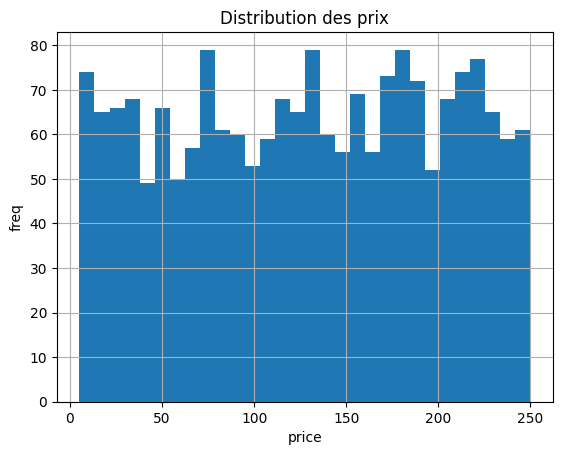

In [ ]:
plt.figure()
ventes['price'].dropna().hist(bins=30)
plt.title('Distribution des prix')
plt.xlabel('price')
plt.ylabel('freq')
plt.show()


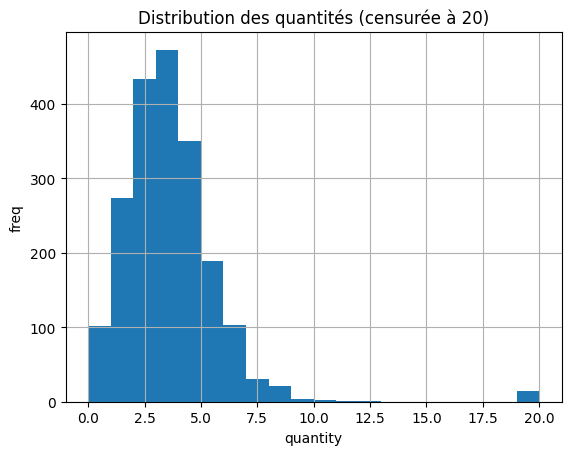

In [ ]:
plt.figure()
ventes['quantity'].clip(upper=20).hist(bins=20)
plt.title('Distribution des quantités (censurée à 20)')
plt.xlabel('quantity')
plt.ylabel('freq')
plt.show()


## 2. Statistiques groupées

In [ ]:
grp = ventes.groupby('category')['total'].sum().sort_values(ascending=False)
grp


,total
category,
Textile,251750.32
Alimentaire,176745.83
Technologie,154274.12
Bricolage,134741.64
Electroménager,117825.21
Hygiène,87215.14


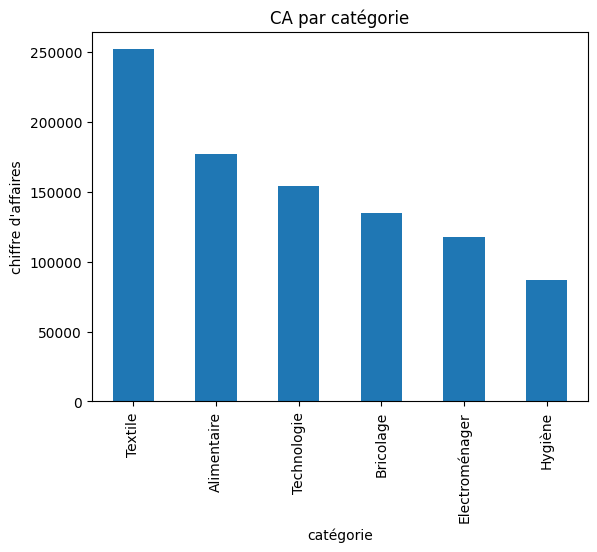

In [ ]:
plt.figure()
grp.plot(kind='bar')
plt.title('CA par catégorie')
plt.xlabel('catégorie')
plt.ylabel('chiffre d\'affaires')
plt.show()


## 3. Corrélations (numériques)

In [ ]:
num_cols = ['price','quantity','total']
corr = ventes[num_cols].corr()
corr


,price,quantity,total
price,1.000000,0.007643,0.206758
quantity,0.007643,1.000000,0.904952
total,0.206758,0.904952,1.000000


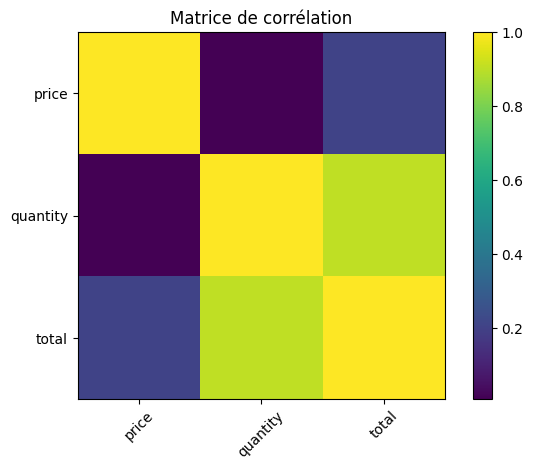

In [ ]:
plt.figure()
plt.imshow(corr, interpolation='nearest')
plt.title('Matrice de corrélation')
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar()
plt.tight_layout()
plt.show()


## 4. Séries temporelles : évolution du CA

/tmp/ipython-input-1798698723.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = ventes.set_index('date').resample('M')['total'].sum()


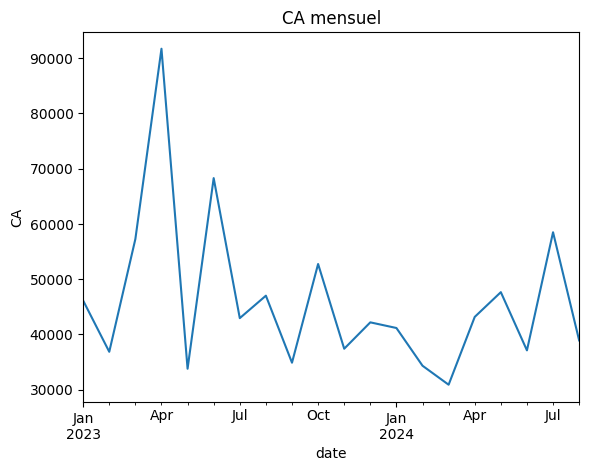

In [ ]:
ts = ventes.set_index('date').resample('M')['total'].sum()
plt.figure()
ts.plot()
plt.title('CA mensuel')
plt.xlabel('date')
plt.ylabel('CA')
plt.show()


## 5. EXERCICE
- Tracez la distribution des `total` après avoir remplacé les valeurs manquantes par 0.
- Affichez le top 10 des produits par CA total.
- Calculez la contribution (%) de chaque ville au CA total et visualisez-la en barres.

## Notebook Analysis and Explanation

This notebook focuses on the exploration and visualization of sales data. Here's a breakdown of the steps and their objectives:

1.  **Data Loading and Preparation:**
    *   The notebook starts by importing necessary libraries: `pandas` for data manipulation, `numpy` for numerical operations, `matplotlib.pyplot` for plotting, and `Path` from `pathlib` for handling file paths.
    *   It defines the data directory and loads two CSV files, 'ventes.csv' and 'produits.csv', into pandas DataFrames named `ventes` and `produits` respectively. The 'date' column in the `ventes` DataFrame is parsed as dates during loading.
    *   The `ventes` DataFrame is then merged with the `produits` DataFrame using the 'product_id' to add the 'category' information to the sales data.
    *   Finally, the first few rows of the merged `ventes` DataFrame are displayed to get a glimpse of the data structure.

2.  **Distributions:**
    *   This section visualizes the distributions of key numerical variables.
    *   A histogram of the 'price' column is plotted to understand the distribution of product prices. Missing values are dropped before plotting.
    *   A histogram of the 'quantity' column is plotted, with values clipped at 20 to focus on the main distribution and avoid outliers. This helps in understanding the typical quantities sold.

3.  **Grouped Statistics:**
    *   This part calculates and displays grouped statistics, specifically focusing on the total revenue by product category.
    *   The `ventes` DataFrame is grouped by 'category', and the sum of the 'total' column is calculated for each category.
    *   The results are sorted in descending order to easily identify the categories with the highest revenue.
    *   A bar plot is generated to visually represent the total revenue per category.

4.  **Correlations (Numerical):**
    *   This section explores the correlations between numerical variables in the sales data.
    *   A subset of the DataFrame containing only numerical columns ('price', 'quantity', and 'total') is created.
    *   The correlation matrix for these numerical columns is calculated using the `.corr()` method.
    *   A heatmap of the correlation matrix is visualized using `imshow` to easily interpret the strength and direction of linear relationships between the variables.

5.  **Time Series: Evolution of Revenue:**
    *   This part analyzes the evolution of total revenue over time.
    *   The `ventes` DataFrame is set with the 'date' column as the index.
    *   The data is then resampled to a monthly frequency ('M') and the total revenue for each month is calculated using `.sum()`. *Note: The code output indicates that 'M' is deprecated and 'ME' should be used instead.*
    *   A line plot of the monthly total revenue is generated to visualize the trend over time.

6.  **Exercise:**
    *   This section presents three exercises for further exploration:
        *   Plotting the distribution of the 'total' column after replacing missing values with 0.
        *   Displaying the top 10 products based on their total revenue.
        *   Calculating and visualizing the percentage contribution of each city to the total revenue.
    *   The subsequent code cells attempt to address these exercises by performing the requested data manipulations and generating the specified plots.

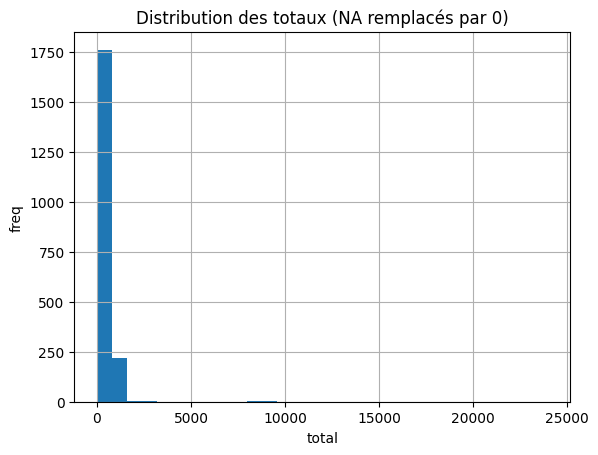

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

DATA_DIR = Path('data')
ventes = pd.read_csv(DATA_DIR / 'ventes.csv', parse_dates=['date'])

# Tracez la distribution des total après avoir remplacé les valeurs manquantes par 0.
plt.figure()
ventes['total'].fillna(0).hist(bins=30)
plt.title('Distribution des totaux (NA remplacés par 0)')
plt.xlabel('total')
plt.ylabel('freq')
plt.show()

In [ ]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path('data')
ventes = pd.read_csv(DATA_DIR / 'ventes.csv', parse_dates=['date'])

# Affichez le top 10 des produits par CA total.
top_10_products = ventes.groupby('product_id')['total'].sum().sort_values(ascending=False).head(10)
print("Top 10 des produits par CA total:")
print(top_10_products)

Top 10 des produits par CA total:
product_id
18    30182.69
11    28152.98
15    25760.35
60    25305.41
87    24676.58
54    24547.91
95    23990.71
49    18329.43
23    16874.03
73    15027.97
Name: total, dtype: float64


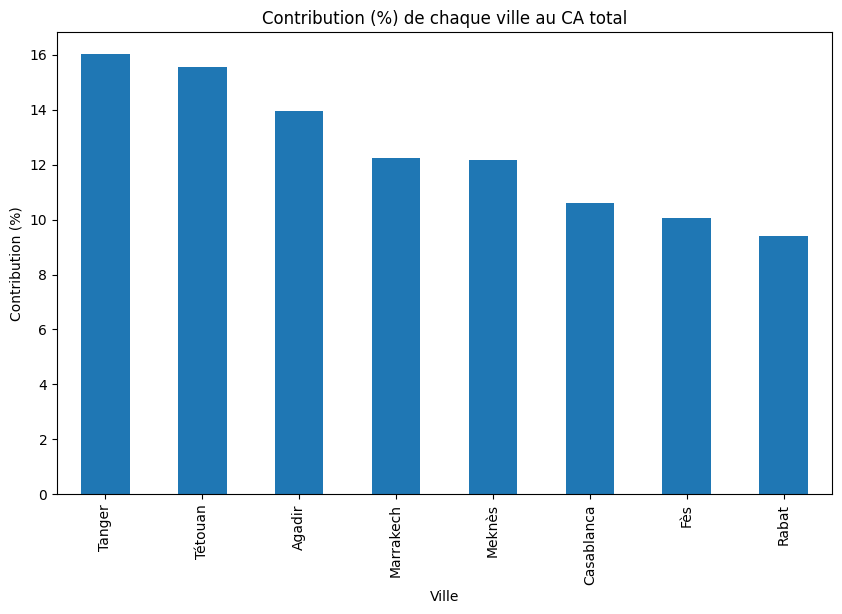

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

DATA_DIR = Path('data')
ventes = pd.read_csv(DATA_DIR / 'ventes.csv', parse_dates=['date'])

# Calculez la contribution (%) de chaque ville au CA total et visualisez-la en barres.
city_revenue = ventes.groupby('city')['total'].sum()
city_contribution = (city_revenue / city_revenue.sum()) * 100

plt.figure(figsize=(10, 6))
city_contribution.sort_values(ascending=False).plot(kind='bar')
plt.title('Contribution (%) de chaque ville au CA total')
plt.xlabel('Ville')
plt.ylabel('Contribution (%)')
plt.show()